# $\color{Green}{\text{Comcast Telecom Consumer Complaints}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Import data into Python environment.

In [2]:
df=pd.read_csv('Comcast_telecom_complaints_data.csv')
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


##### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [3]:
df['month'] = pd.to_datetime(df["Date_month_year"]).dt.month_name()
df['date'] = pd.to_datetime(df["Date_month_year"]).dt.day
display(df.head(2))

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4


In [4]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
month                          object
date                            int64
dtype: object

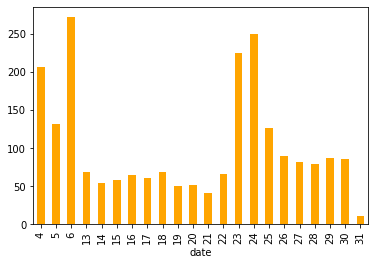

In [5]:
df.groupby(['date'])['Customer Complaint'].count().plot(kind='bar', color='orange')
plt.show()

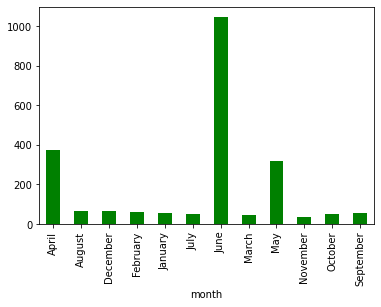

In [6]:
df.groupby(['month'])['Customer Complaint'].count().plot(kind='bar', color='green')
plt.show()

##### Provide a table with the frequency of complaint types.

In [7]:
df['Customer Complaint'].str.lower().value_counts().to_frame().reset_index()

,index,Customer Complaint
0,comcast,102
1,comcast data cap,30
2,comcast internet,29
3,comcast data caps,21
4,comcast billing,18
...,...,...
1735,isp dishonest about speeds,1
1736,comcast rate hike,1
1737,comcast refuses service to my address,1
1738,internet pricing /competition,1


##### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [8]:
df['Customer Complaint'].str.lower().value_counts().head()

comcast              102
comcast data cap      30
comcast internet      29
comcast data caps     21
comcast billing       18
Name: Customer Complaint, dtype: int64

In [9]:
df.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

##### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [10]:
df['Status']=df['Status'].apply(lambda x:'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')
df.Status.value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

In [11]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4


##### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

'Open'

,State,Status
0,Alabama,9
1,Arizona,6


'Closed'

,State,Status
0,Alabama,17
1,Arizona,14


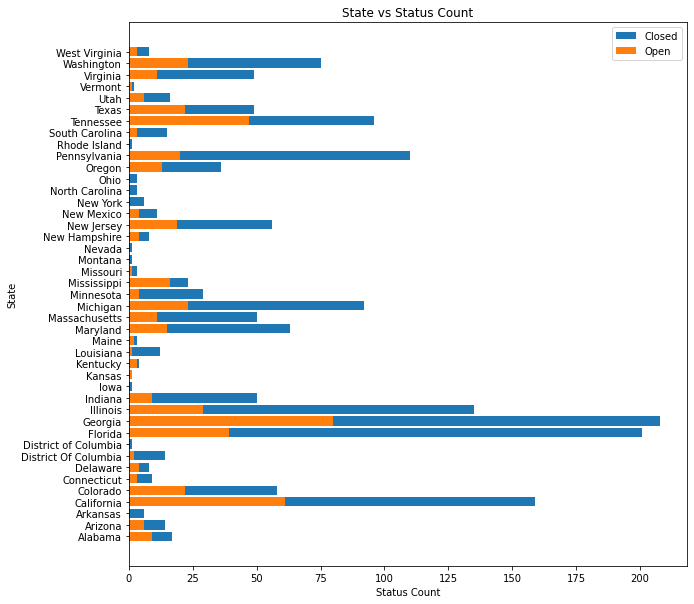

In [12]:
op=df[df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
cl=df[df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

display('Open', op.head(2))
display('Closed', cl.head(2))

fig=plt.figure(figsize=(10,10))
plt.barh(cl.State, cl.Status)
plt.barh(op.State, op.Status)

plt.ylabel("State", size=10)
plt.xlabel("Status Count")
plt.legend(["Closed", "Open"])
plt.title("State vs Status Count")
plt.show()

In [13]:
op.sort_values('Status',ascending=False).head(3)

,State,Status
8,Georgia,80
2,California,61
27,Tennessee,47


In [14]:
cl.sort_values('Status', ascending=False).head(3)

,State,Status
10,Georgia,208
9,Florida,201
3,California,159


##### Which state has the maximum complaints

In [15]:
'Georgia'

'Georgia'

In [16]:
op.head(1)

,State,Status
0,Alabama,9


In [17]:
all_state_total_comp=df.groupby(['State'])['Status'].count().to_frame().sort_values('Status',ascending=False)
all_state_total_comp.head()

,Status
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


##### Which state has the highest percentage of unresolved complaints

In [18]:
# i.e ratio of open complaints wrt to all comp
# open/(open/closed)
unresolved_df=all_state_total_comp.merge(op,on='State')
display(unresolved_df.head(2))

unresolved_df['Perc_ur']=(unresolved_df['Status_y']/unresolved_df['Status_x'])*100
display(unresolved_df.head(2))

unresolved_df.sort_values('Perc_ur', ascending=False).head(5)

,State,Status_x,Status_y
0,Georgia,288,80
1,Florida,240,39


,State,Status_x,Status_y,Perc_ur
0,Georgia,288,80,27.777778
1,Florida,240,39,16.250000


,State,Status_x,Status_y,Perc_ur
33,Kansas,2,1,50.000000
29,Kentucky,7,3,42.857143
16,Mississippi,39,16,41.025641
30,Maine,5,2,40.000000
18,Alabama,26,9,34.615385


In [19]:
#Which state has the highest percentage of unresolved complaints
'Kansas'

'Kansas'

##### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [20]:
df[df['Status']=='Closed'][['Received Via']].value_counts(normalize=True)*100


Received Via      
Customer Care Call    50.615114
Internet              49.384886
dtype: float64


$\color{green}{\text{Thank You}}$<br>
$\color{green}{\text{Rajeev Vhanhuve}}$